## Logistic Regression with multiple linear 

In [30]:
import pandas as pd #reading data
import numpy as np
import math 
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib.pyplot as plt #draw graph 
from matplotlib.pyplot import figure #draw graph
from sklearn.datasets import load_digits #ảnh của chữ viết và được lưu vào bộ dữ liệu tên là load digits
from sklearn.model_selection import train_test_split # chia tập hợp thành 2 tập, huấn luyện và kiểm thử 
from sklearn.metrics import confusion_matrix # dùng để hiển thị trực quan sự khác nhau đầu ra của data dự đoán và data thực tế

In [31]:
digits = load_digits() #các data chữ viết
dir(digits) #xem digits có các trường nào 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [32]:
len(digits['images']) #1797 ảnh 
digits['images'][0] #mỗi ảnh có 8x8 matrix
#digits['images'][0].shape
digits['images'][1796]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

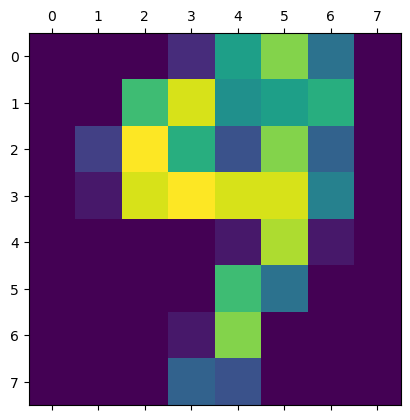

In [35]:
plt.matshow(digits['images'][1612])
digits['target'][1612] #check phần tử 0 đây là số mấy 
#classification , dạng toán phân loại 

In [38]:
#Ta cần chia 80/20 tức là ta sẽ đánh giá chất lượng của mô hình này bằng cách chia số phần tử của tập hợp ban đầu ra thành 2 tập 
# 1 tập là traning, 1 tập là tập test 
# ở dưới ta chia 20% là tập test gòm x_test và y_test và 80% là là tập train. 
# cụ thể hơn là lấy 80% là để ta đưa vào huấn luyện còn 20% còn lại để chúng ta test (20% này không cho mô hình biết)
X = digits.data       # đặc trưng
y = digits.target     # nhãn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
len(X_train)/len(X) #80%  

0.7996661101836394

In [48]:
model = LogisticRegression(max_iter=2000) #do phần tử của digits khá nhiều 
#train the model with training set
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [49]:
#tính chất lượng của model 
model.score(X_test, y_test)

0.9472222222222222

In [51]:
X_test[1], y_test[1]

(array([ 0.,  0.,  4., 16.,  1.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,
         1.,  1.,  0.,  0.,  3., 16.,  8.,  5., 16.,  6.,  0.,  0.,  9.,
        16.,  6., 14., 16.,  2.,  0.,  0., 11., 16., 16., 16.,  9.,  0.,
         0.,  0.,  0., 10., 15., 15.,  2.,  0.,  0.,  0.,  0.,  3., 16.,
         9.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.]),
 np.int64(4))

In [57]:
model.predict([X_test[1]])
#predict probability 
model.predict_proba([X_test[2]])

array([[4.44860755e-05, 1.96343500e-07, 8.98020048e-05, 9.70592079e-01,
        6.38830407e-12, 4.24632050e-04, 6.82551717e-06, 1.58746937e-07,
        2.88403266e-02, 1.49393466e-06]])

In [58]:
confusion_matrix(y_test, model.predict(X_test))

array([[36,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 26,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  1,  1,  0,  1,  0,  0, 32,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  3, 40]])

Text(206.66666666666669, 0.5, 'True Values')

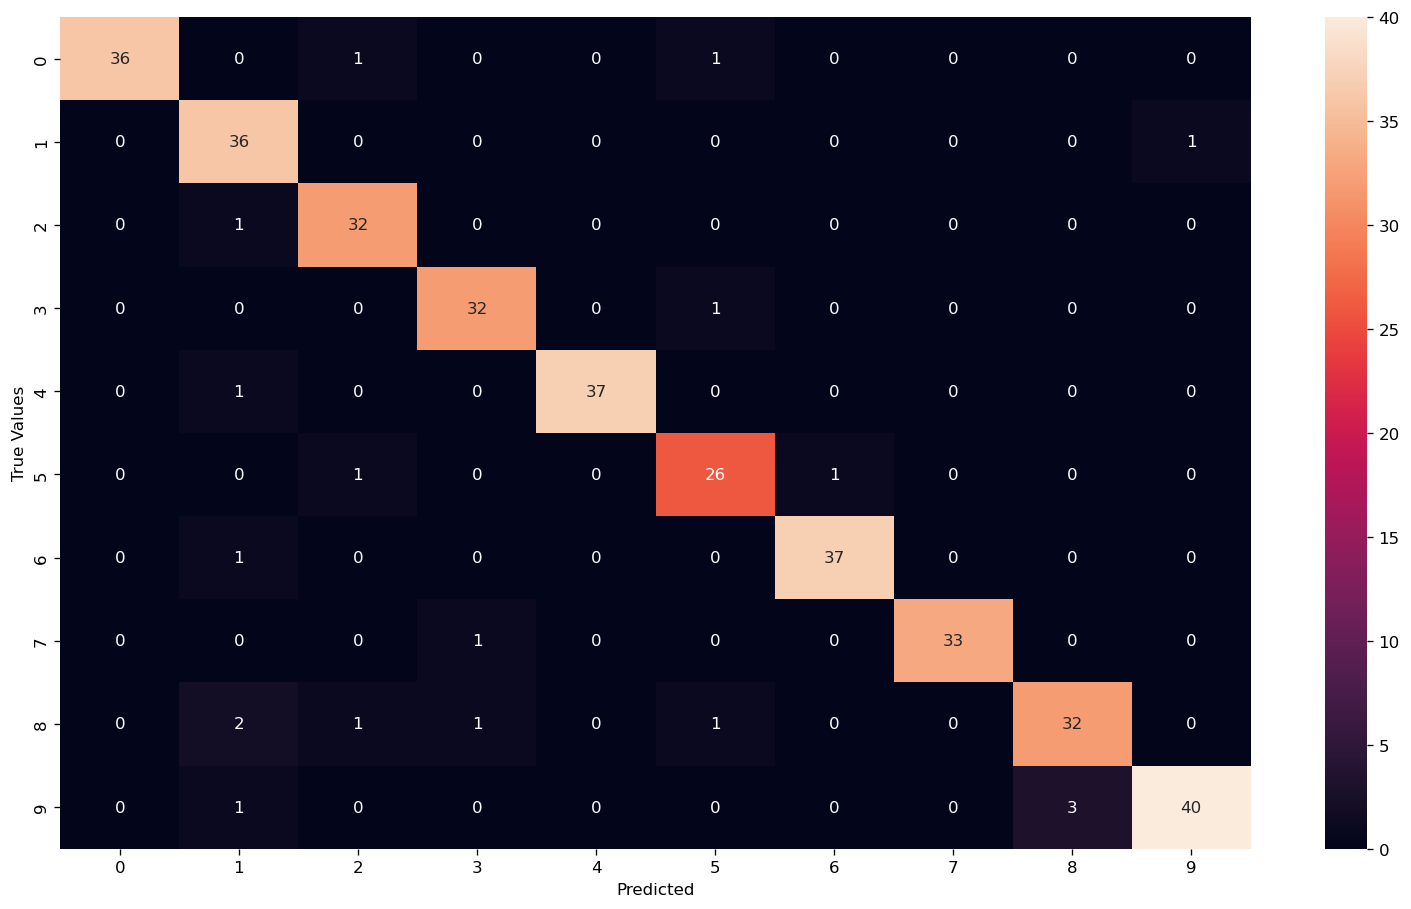

In [70]:
import seaborn 
plt.figure(figsize = (16,9), dpi=120)
# Vẽ Tính ma trận nhầm lẫn
seaborn.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot = True)
plt.xlabel("Predicted") #truc hoanh
plt.ylabel("True Values") #truc tung